# Modelling

## Imports

In [502]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Feature selection

In [503]:
# # Dataset
# Train_X_std = pd.read_csv("datasets/Train_X_std.csv")
# Test_X_std = pd.read_csv("datasets/Test_X_std.csv")
# display(Train_X_std.head())
# display(Test_X_std.head())

In [504]:
# # Dataset
# Train_X_std = pd.read_csv("datasets/Train_X_std.csv")
# Test_X_std = pd.read_csv("datasets/Test_X_std.csv")

# features = [i for i in Train_X_std.columns if ("store" not in i) and ("year" not in i)]
# display(features)

# Train_X_std = Train_X_std[features]
# Test_X_std = Test_X_std[features]
# display(Train_X_std.head())
# display(Test_X_std.head())

In [506]:
# # Dataset
# Train_X_std = pd.read_csv("datasets/Train_X_std.csv")
# Test_X_std = pd.read_csv("datasets/Test_X_std.csv")
# display(Train_X_std.head())
# display(Test_X_std.head())

# Train_X_std = Train_X_std[["holiday_flag","temperature","fuel_price","cpi","unemployment"]]
# Test_X_std = Test_X_std[["holiday_flag","temperature","fuel_price","cpi","unemployment"]]
# display(Train_X_std.head())
# display(Test_X_std.head())

In [505]:
# Dataset
Train_X_std = pd.read_csv("datasets/Train_X_std.csv")
Test_X_std = pd.read_csv("datasets/Test_X_std.csv")

features = [i for i in Train_X_std.columns if ("store" not in i) and ("month" not in i) and ("year" not in i)]
display(features)

Train_X_std = Train_X_std[features]
Test_X_std = Test_X_std[features]
display(Train_X_std.head())
display(Test_X_std.head())

['holiday_flag',
 'temperature',
 'fuel_price',
 'cpi',
 'unemployment',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,-0.27382,1.387482,0.997707,-1.172478,0.428047,-0.260276,-0.112987,3.617021,-1.424752,-0.211061,-0.261653
1,-0.27382,-0.433635,-1.017613,0.976518,-0.579850,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653
2,-0.27382,1.664716,1.026030,-1.175951,0.619144,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653
3,-0.27382,-0.174411,0.402915,-1.184842,-1.435354,3.842081,-0.112987,-0.276471,-1.424752,-0.211061,-0.261653
4,-0.27382,0.793177,1.073962,0.867124,-0.364563,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653


,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,-0.273820,1.431687,-0.109085,1.295626,-0.856417,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653
1,3.652034,-0.422175,-0.856387,0.906294,0.604631,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653
2,-0.273820,0.023145,1.226473,-0.988542,0.509485,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653
3,-0.273820,0.105005,2.041316,-1.130774,-0.146051,-0.260276,-0.112987,-0.276471,0.701877,-0.211061,-0.261653
4,3.652034,1.112978,-1.793239,0.908392,0.511098,-0.260276,-0.112987,-0.276471,-1.424752,4.737961,-0.261653


In [507]:
Train_X_std["holiday_flag"] = np.where(Train_X_std["holiday_flag"]<0, 0,1)
Test_X_std["holiday_flag"] = np.where(Test_X_std["holiday_flag"]<0, 0,1)

**NOTE:**

- Using dummy variables for all categorical features makes the data too granular and convoluted as evidenced by the PCA decomposition in the pre-processing notebook. See figure below:

![PCA](raw_data/pca.png)

- Going forward, I will assume that all stores (store 1 to store 45) are within the same market segment and ignore store to store differences.
- Additionally, the holiday_flag feature does not need to be standardized as the values are already within scale for analysis.
- To that effect, I have mapped the holiday_flag feature back to 1s and 0s and eliminated the store, month and year features from the data.

In [508]:
Train_Y = pd.read_csv("datasets/Train_Y.csv")
Train_Y = Train_Y["weekly_sales"]

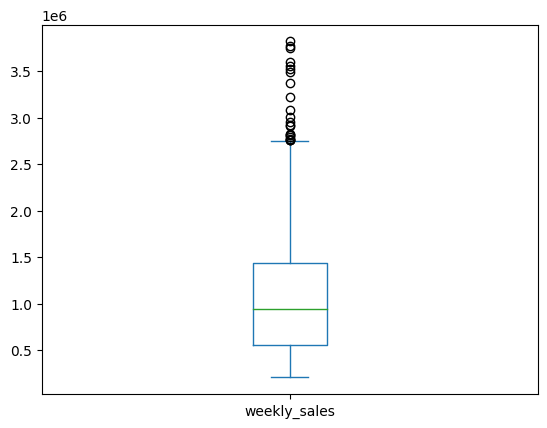

In [509]:
Train_Y.plot(kind="box")
plt.show()

In [510]:
Train_Y.describe()

count    4.760000e+03
mean     1.050347e+06
std      5.702940e+05
min      2.099862e+05
25%      5.563754e+05
50%      9.489712e+05
75%      1.434877e+06
max      3.818686e+06
Name: weekly_sales, dtype: float64

In [511]:
Test_Y = pd.read_csv("datasets/Test_Y.csv")
Test_Y = Test_Y["weekly_sales"]

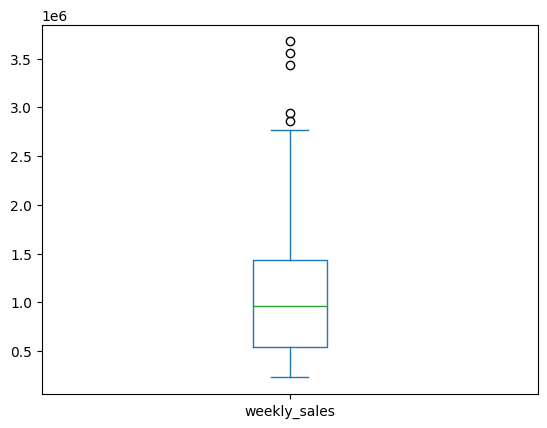

In [512]:
Test_Y.plot(kind="box")
plt.show()

In [513]:
Test_Y.describe()

count    1.191000e+03
mean     1.053662e+06
std      5.804415e+05
min      2.297320e+05
25%      5.409287e+05
50%      9.604761e+05
75%      1.437721e+06
max      3.676389e+06
Name: weekly_sales, dtype: float64

## Principal Component Analysis (PCA)

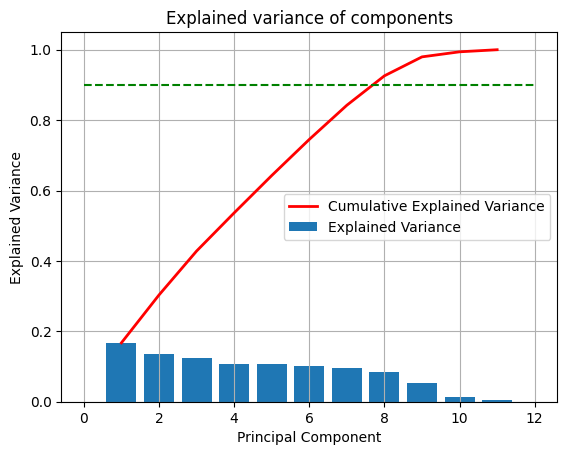

In [514]:
# Reducing features with pca
pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots()
x_values = range(1, pca.n_components_ + 1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label="Explained Variance")
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label="Cumulative Explained Variance", color="red")
plt.plot([0, pca.n_components_ + 1], [0.9,0.9], "g--")

ax.set_title("Explained variance of components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")

plt.legend()
plt.grid()
plt.show()

**NOTE:**
- We can infer that feature reduction may be unnecessary as, although 90% of the variance is explained cumulatively by 8/10 principal components, only one of the components had a variance that was signifcantly lower than the others.

- That, combined with the relatively small number of features, may allow us to ignore feature reduction.

## Preliminary models

- Here, I will perform preliminary evaluation of a few models with no parameter tuning to get a feel for their effectiveness

### Linear regression

Test->  574983.0132293956 Train->  564488.2788837353


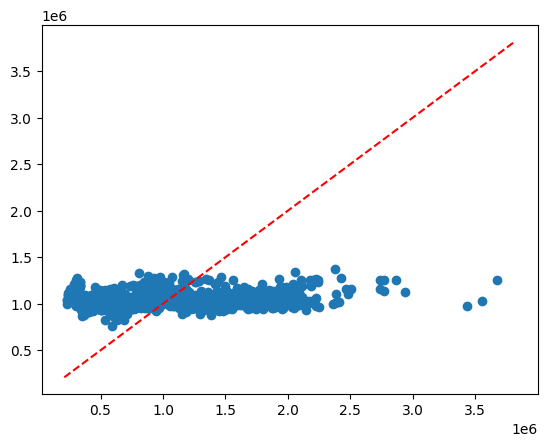

In [515]:
lr = LinearRegression().fit(Train_X_std,Train_Y)

ypred_test = lr.predict(Test_X_std)
ypred_train = lr.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2)) 

plt.scatter(Test_Y,ypred)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
plt.show()

### Ridge regression

Test->  574982.7624598222 Train->  564488.2827599258


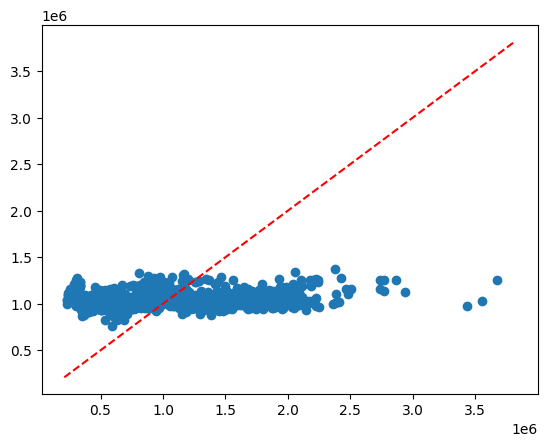

In [516]:
ridge = Ridge().fit(Train_X_std,Train_Y)

ypred_test = ridge.predict(Test_X_std)
ypred_train = ridge.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

plt.scatter(Test_Y,ypred)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
plt.show()

### Lasso regression

Test->  574982.8623592296 Train->  564488.2789362016


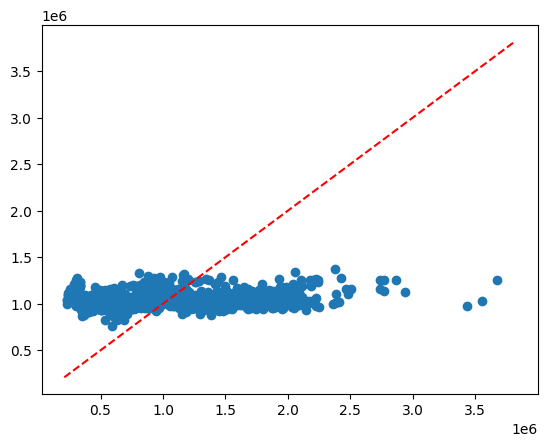

In [517]:
lasso = Lasso().fit(Train_X_std,Train_Y)

ypred_test = lasso.predict(Test_X_std)
ypred_train = lasso.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

plt.scatter(Test_Y,ypred)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
plt.show()

### Random forest regression

Test->  522058.7567405342 Train->  262812.30687209714


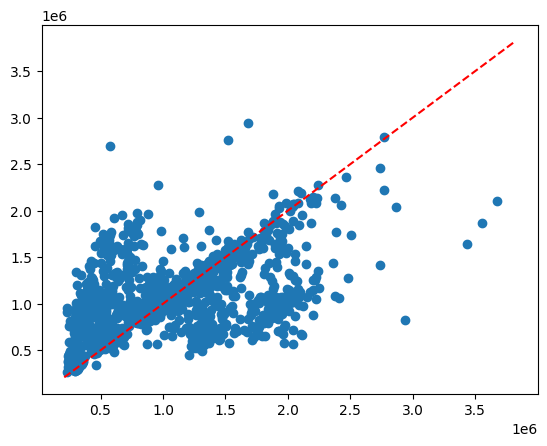

In [518]:
SEED = 123
rf = RandomForestRegressor(random_state=SEED)
rf.fit(Train_X_std,Train_Y)

ypred_test = rf.predict(Test_X_std)
ypred_train = rf.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

plt.scatter(Test_Y,ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()],[Train_Y.min(), Train_Y.max()],"r--")
plt.show()

**NOTE:**
- On initial evaluation, Random forest regression appears to be our best model and shows the strongest correlation between predicted y and actual y.
- However, this is likely due to overfitting
- Cross validation, model tuning and evaluation will produce more information.

## Cross validation

### Ridge regression CV

In [519]:
alphas = [0.1,1.0,10.0,100.0,1000.0,10000.0]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(Train_X_std,Train_Y)
    ridge_scores.append(ridge.score(Test_X_std,Test_Y))

[i for i in zip(alphas,ridge_scores)]

[(0.1, 0.01789518038592197),
 (1.0, 0.017895950476560896),
 (10.0, 0.017902814154747815),
 (100.0, 0.017922847766990047),
 (1000.0, 0.017464920172988174),
 (10000.0, 0.009674331917995271)]

In [520]:
ind = np.argsort(ridge_scores)[-1]
ALPHA_RIDGE = alphas[ind]
print(f"The alpha value of {ALPHA_RIDGE} appears to be the best")

The alpha value of 100.0 appears to be the best


In [521]:
ridge = Ridge(alpha=ALPHA_RIDGE).fit(Train_X_std,Train_Y)

ypred_test = ridge.predict(Test_X_std)
ypred_train = ridge.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

Test->  574974.8887603641 Train->  564511.4083276871


### Lasso regression CV

In [522]:
alphas = [0.1,1,10,100,1000,10000]
lasso_scores = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha).fit(Train_X_std,Train_Y)
    lasso_scores.append(lasso.score(Test_X_std,Test_Y))

[i for i in zip(alphas,lasso_scores)]

[(0.1, 0.017895145430881332),
 (1, 0.01789560920851785),
 (10, 0.017900238573317684),
 (100, 0.017944996399238522),
 (1000, 0.018190811069959345),
 (10000, 0.016721894642611423)]

In [523]:
ind = np.argsort(lasso_scores)[-1]
ALPHA_LASSO = alphas[ind]
print(f"The alpha value of {ALPHA_RIDGE} appears to be the best")

The alpha value of 100.0 appears to be the best


In [524]:
lasso = Lasso(alpha=ALPHA_LASSO).fit(Train_X_std,Train_Y)

ypred_test = lasso.predict(Test_X_std)
ypred_train = lasso.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

Test->  574896.4414198535 Train->  564523.6050533969


### Random forest regression CV

In [525]:
rf = RandomForestRegressor(random_state=SEED)
params_rf={'n_estimators':[300,400,500],'max_depth':[4,6,8],'min_samples_leaf':[0.1,0.2],'max_features':['log2','sqrt']}
grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf,cv=3,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
grid_rf.fit(Train_X_std,Train_Y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [526]:
best_rf_hyperparams = grid_rf.best_params_
best_rf_hyperparams

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 400}

Test->  568365.2595037286 Train->  559593.2450257661


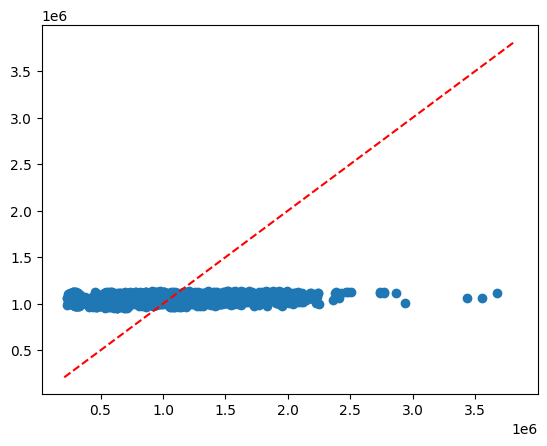

In [527]:
best_rf_model = grid_rf.best_estimator_
ypred_test = best_rf_model.predict(Test_X_std)
ypred_train = best_rf_model.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

plt.scatter(Test_Y,ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
plt.show()

**NOTE:**
- The best parameters based on test RMSE appear to be:
    - Alpha of 100 (for lasso and ridge)
    - Random forest with {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400}

## Evaluation functions

In [528]:
# Model_Evaluation_Comparison_Matrix or MECM
columns = ["Train-R2","Test-R2","Train-RSS","Test-RSS","Train-MSE","Test-MSE","Train-RMSE","Test-RMSE"]
MECM = pd.DataFrame(np.zeros([1,8]),columns=columns)

In [529]:
# Function to evaluate models
def Evaluate(column_index,pred_train,pred_test):
    # Evaluating the given model
    print("\n\n{}Training Set Metrics{}".format("-"*20,"-"*20))
    print("\nR2-Score on Training set --->",round(r2_score(Train_Y,pred_train),20))
    print("Residual Sum of Squares (RSS) on Training set  --->",round(np.sum(np.square(Train_Y-pred_train)),20))
    print("Mean Squared Error (MSE) on Training set       --->",round(MSE(Train_Y,pred_train),20))
    print("Root Mean Squared Error (RMSE) on Training set --->",round(np.sqrt(MSE(Train_Y,pred_train)),20))
    
    print("\n{}Testing Set Metrics{}".format("-"*20,"-"*20))
    print("\nR2-Score on Testing set --->",round(r2_score(Test_Y,pred_test),20))
    print("Residual Sum of Squares (RSS) on Training set  --->",round(np.sum(np.square(Test_Y-pred_test)),20))
    print("Mean Squared Error (MSE) on Training set       --->",round(MSE(Test_Y,pred_test),20))
    print("Root Mean Squared Error (RMSE) on Training set --->",round(np.sqrt(MSE(Test_Y,pred_test)),20))
    print("\n{}Residual Plots{}".format("-"*20,"-"*20))
    
    MECM.loc[column_index,"Train-R2"]  = round(r2_score(Train_Y,pred_train),20)
    MECM.loc[column_index,"Test-R2"]   = round(r2_score(Test_Y,pred_test),20)
    MECM.loc[column_index,"Train-RSS"] = round(np.sum(np.square(Train_Y-pred_train)),20)
    MECM.loc[column_index,"Test-RSS"]  = round(np.sum(np.square(Test_Y-pred_test)),20)
    MECM.loc[column_index,"Train-MSE"] = round(MSE(Train_Y,pred_train),20)
    MECM.loc[column_index,"Test-MSE"]  = round(MSE(Test_Y,pred_test),20)
    MECM.loc[column_index,"Train-RMSE"] = round(np.sqrt(MSE(Train_Y,pred_train)),20)
    MECM.loc[column_index,"Test-RMSE"] = round(np.sqrt(MSE(Test_Y,pred_test)),20)
    
    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])
    
    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred_train))
    plt.title("Error Terms")
    plt.xlabel("Errors")
    
    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred_train)
    plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
    plt.title("Test vs Prediction")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

In [530]:
def Evaluate_All():
    # Linear regression Model
    MLR = LinearRegression().fit(Train_X_std, Train_Y)
    pred_train = MLR.predict(Train_X_std)
    pred_test = MLR.predict(Test_X_std)
    print("{}{} Evaluating Multiple Linear Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regression Model was found to be ",MLR.intercept_)
    Evaluate(0, pred_train, pred_test)
    
    # Ridge regression Model
    RLR = Ridge(alpha = ALPHA_RIDGE).fit(Train_X_std,Train_Y)
    pred_train = RLR.predict(Train_X_std)
    pred_test = RLR.predict(Test_X_std)
    print("{}{} Evaluating Ridge Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regression Model was found to be ",RLR.intercept_)
    Evaluate(1,pred_train,pred_test)
    
    # Lasso Regression Model
    LLR = Lasso(alpha = ALPHA_LASSO).fit(Train_X_std,Train_Y)
    pred_train = LLR.predict(Train_X_std)
    pred_test = LLR.predict(Test_X_std)
    print("{}{} Evaluating Lasso Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regression Model was found to be ",LLR.intercept_)
    Evaluate(2,pred_train,pred_test)
    
    # Random Forest Regression Model
    best_rf_model.fit(Train_X_std,Train_Y)
    pred_train = best_rf_model.predict(Train_X_std)
    pred_test = best_rf_model.predict(Test_X_std)
    print("{}{} Evaluating Random Forest Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    Evaluate(3,pred_train,pred_test)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regression Model was found to be  1045291.8901806717


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.020050982934323613
Residual Sum of Squares (RSS) on Training set  ---> 1516759800906299.2
Mean Squared Error (MSE) on Training set       ---> 318647016997.1217
Root Mean Squared Error (RMSE) on Training set ---> 564488.2788837353

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.01789509381829779
Residual Sum of Squares (RSS) on Training set  ---> 393751109413305.25
Mean Squared Error (MSE) on Training set       ---> 330605465502.35535
Root Mean Squared Error (RMSE) on Training set ---> 574983.0132293956

--------------------Residual Plots--------------------


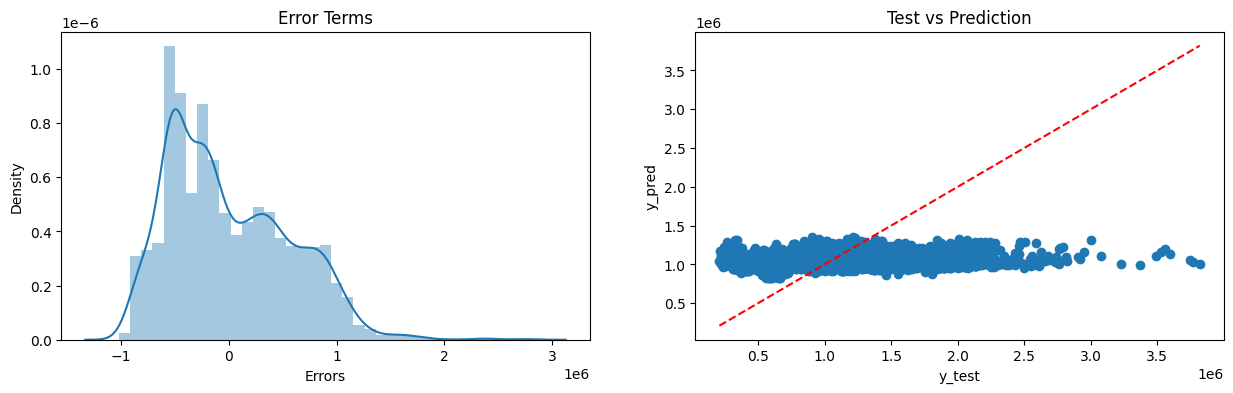

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regression Model was found to be  1046598.4476783946


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.01997067607564318
Residual Sum of Squares (RSS) on Training set  ---> 1516884099428837.0
Mean Squared Error (MSE) on Training set       ---> 318673130132.10864
Root Mean Squared Error (RMSE) on Training set ---> 564511.4083276871

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.017922847766990047
Residual Sum of Squares (RSS) on Training set  ---> 393739982141646.8
Mean Squared Error (MSE) on Training set       ---> 330596122704.9931
Root Mean Squared Error (RMSE) on Training set ---> 574974.8887603641

--------------------Residual Plots--------------------


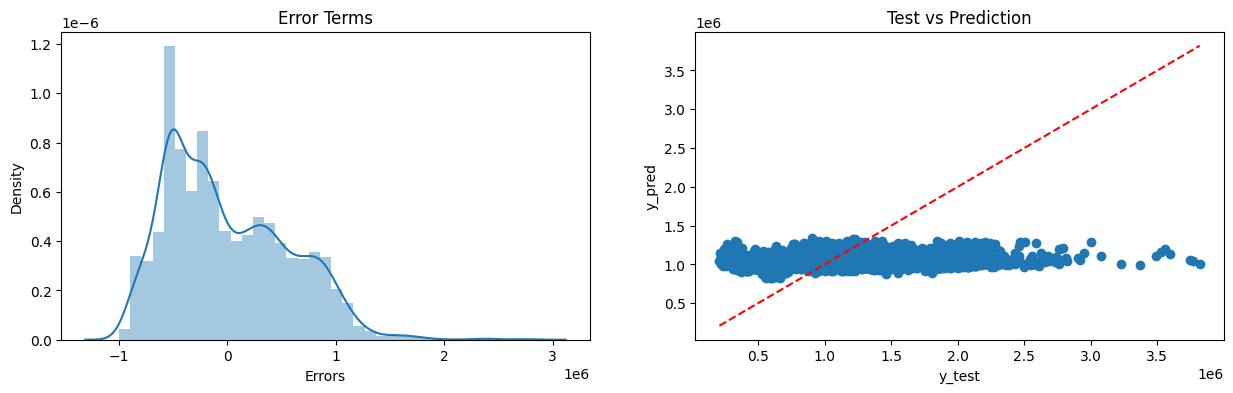

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regression Model was found to be  1046466.7660267901


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.019928326965230614
Residual Sum of Squares (RSS) on Training set  ---> 1516949647153422.0
Mean Squared Error (MSE) on Training set       ---> 318686900662.48364
Root Mean Squared Error (RMSE) on Training set ---> 564523.6050533969

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.018190811069959345
Residual Sum of Squares (RSS) on Training set  ---> 393632548763438.4
Mean Squared Error (MSE) on Training set       ---> 330505918357.21106
Root Mean Squared Error (RMSE) on Training set ---> 574896.4414198535

--------------------Residual Plots--------------------


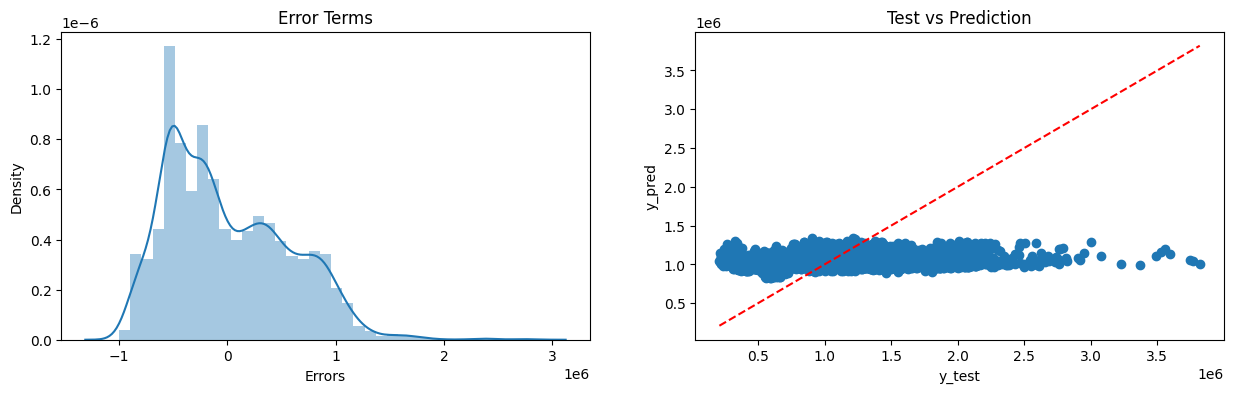

<<<----------------------------------- Evaluating Random Forest Regression Model ----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.036972805387661456
Residual Sum of Squares (RSS) on Training set  ---> 1490568295421503.0
Mean Squared Error (MSE) on Training set       ---> 313144599878.46704
Root Mean Squared Error (RMSE) on Training set ---> 559593.2450257661

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.04037202380771365
Residual Sum of Squares (RSS) on Training set  ---> 384739530238992.25
Mean Squared Error (MSE) on Training set       ---> 323039068210.7408
Root Mean Squared Error (RMSE) on Training set ---> 568365.2595037286

--------------------Residual Plots--------------------


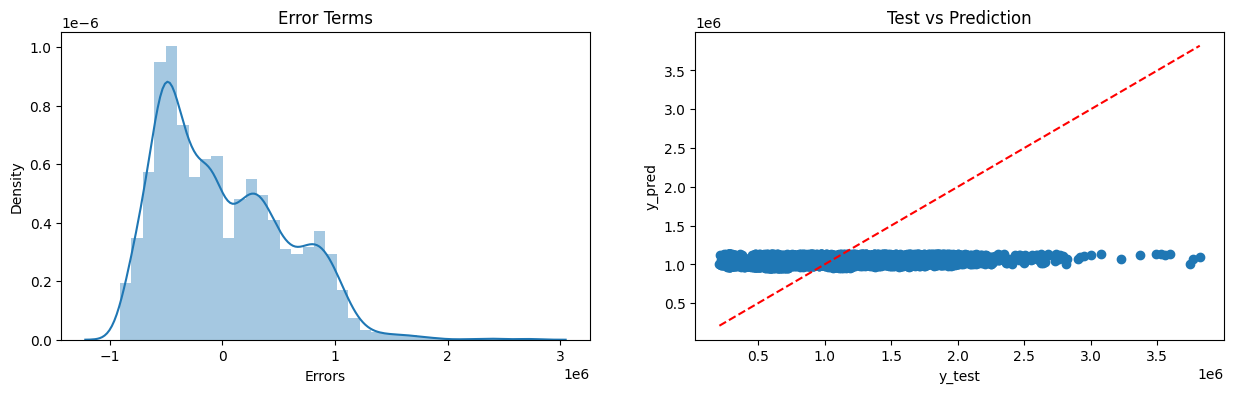

In [531]:
Evaluate_All()

## Comparing the model evaluation metrics

In [532]:
MECM

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
0,0.020051,0.017895,1.516760e+15,3.937511e+14,3.186470e+11,3.306055e+11,564488.278884,574983.013229
1,0.019971,0.017923,1.516884e+15,3.937400e+14,3.186731e+11,3.305961e+11,564511.408328,574974.888760
2,0.019928,0.018191,1.516950e+15,3.936325e+14,3.186869e+11,3.305059e+11,564523.605053,574896.441420
3,0.036973,0.040372,1.490568e+15,3.847395e+14,3.131446e+11,3.230391e+11,559593.245026,568365.259504


In [533]:
MECM.index = ["Multiple Linear Regression (MLR)","Ridge Linear Regression (RLR)",
              "Lasso Linear Regression (LLR)","Random Forest Regression Model (RF)"]
MECM

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.020051,0.017895,1.516760e+15,3.937511e+14,3.186470e+11,3.306055e+11,564488.278884,574983.013229
Ridge Linear Regression (RLR),0.019971,0.017923,1.516884e+15,3.937400e+14,3.186731e+11,3.305961e+11,564511.408328,574974.888760
Lasso Linear Regression (LLR),0.019928,0.018191,1.516950e+15,3.936325e+14,3.186869e+11,3.305059e+11,564523.605053,574896.441420
Random Forest Regression Model (RF),0.036973,0.040372,1.490568e+15,3.847395e+14,3.131446e+11,3.230391e+11,559593.245026,568365.259504


In [534]:
MECM.sort_values("Train-R2",ascending=False)

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.036973,0.040372,1.490568e+15,3.847395e+14,3.131446e+11,3.230391e+11,559593.245026,568365.259504
Multiple Linear Regression (MLR),0.020051,0.017895,1.516760e+15,3.937511e+14,3.186470e+11,3.306055e+11,564488.278884,574983.013229
Ridge Linear Regression (RLR),0.019971,0.017923,1.516884e+15,3.937400e+14,3.186731e+11,3.305961e+11,564511.408328,574974.888760
Lasso Linear Regression (LLR),0.019928,0.018191,1.516950e+15,3.936325e+14,3.186869e+11,3.305059e+11,564523.605053,574896.441420


In [535]:
MECM.sort_values("Test-R2",ascending=False)

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.036973,0.040372,1.490568e+15,3.847395e+14,3.131446e+11,3.230391e+11,559593.245026,568365.259504
Lasso Linear Regression (LLR),0.019928,0.018191,1.516950e+15,3.936325e+14,3.186869e+11,3.305059e+11,564523.605053,574896.441420
Ridge Linear Regression (RLR),0.019971,0.017923,1.516884e+15,3.937400e+14,3.186731e+11,3.305961e+11,564511.408328,574974.888760
Multiple Linear Regression (MLR),0.020051,0.017895,1.516760e+15,3.937511e+14,3.186470e+11,3.306055e+11,564488.278884,574983.013229


In [536]:
MECM.sort_values("Train-RMSE")

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.036973,0.040372,1.490568e+15,3.847395e+14,3.131446e+11,3.230391e+11,559593.245026,568365.259504
Multiple Linear Regression (MLR),0.020051,0.017895,1.516760e+15,3.937511e+14,3.186470e+11,3.306055e+11,564488.278884,574983.013229
Ridge Linear Regression (RLR),0.019971,0.017923,1.516884e+15,3.937400e+14,3.186731e+11,3.305961e+11,564511.408328,574974.888760
Lasso Linear Regression (LLR),0.019928,0.018191,1.516950e+15,3.936325e+14,3.186869e+11,3.305059e+11,564523.605053,574896.441420


In [537]:
MECM.sort_values("Test-RMSE")

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.036973,0.040372,1.490568e+15,3.847395e+14,3.131446e+11,3.230391e+11,559593.245026,568365.259504
Lasso Linear Regression (LLR),0.019928,0.018191,1.516950e+15,3.936325e+14,3.186869e+11,3.305059e+11,564523.605053,574896.441420
Ridge Linear Regression (RLR),0.019971,0.017923,1.516884e+15,3.937400e+14,3.186731e+11,3.305961e+11,564511.408328,574974.888760
Multiple Linear Regression (MLR),0.020051,0.017895,1.516760e+15,3.937511e+14,3.186470e+11,3.306055e+11,564488.278884,574983.013229


### RMSE comparisons

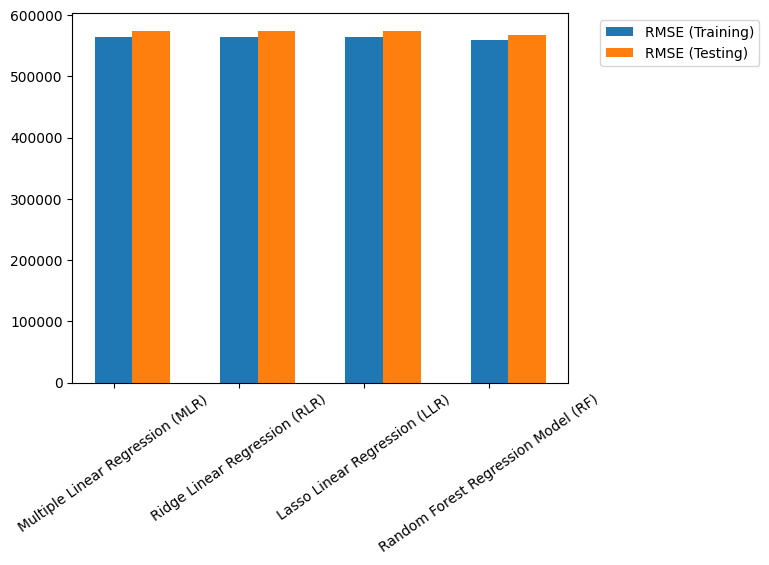

In [538]:
columns = MECM.columns
n = MECM.shape[0]

plt.bar(np.arange(n), MECM['Train-RMSE'], width=0.3, label="RMSE (Training)")
plt.bar(np.arange(n)+0.3, MECM['Test-RMSE'], width=0.3, label="RMSE (Testing)")
plt.xticks(np.arange(n), MECM.index, rotation=35)
plt.legend(bbox_to_anchor=(1.05,1.0), loc='upper left')
plt.show()

### Inference
- Lower RMSE implies a better the model. That said, a significant disparity between training and testing scores would suggest overfitting.
- All regression models were fairly similar in terms of training and test R2 and RMSE.
    - However, Multiple linear regression performed best in training metrics but worst in test metrics suggesting that it was slightly overfitting.
    - This is in line with what we would expect from lasso and ridge regression which work to combat overfitting.
- **Random forest regression** performed best for all metrics and gave the best overall results.

# Conclusions

Here are some key conclusions:
- The dataset was quite small with just 6435 samples initially, which dropped 7.5% after cleaning.
- Cross validating the Lasso and Ridge regressions allowed us to select the best alpha.
- We will proceed with the **Random forest regression model** as it performed best.

# Further steps
These are some further steps to consider:
- using pca for feature reduction
- using more of the generated features in the regression
- testing more parameters in the grid search cv at the cost of time
- using random forest with bagging, boosting etc
- using a polynomial regression model